In [1]:
import sys
sys.path.append('..')
import os
import ipywidgets as widgets
from utils import others, visualizer
from models import INR, HEVC

/root/anaconda3/envs/silen/lib/python3.10/site-packages/haiku/_src/data_structures.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))
/root/anaconda3/envs/silen/lib/python3.10/site-packages/haiku/_src/data_structures.py:206: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, structure = jax.tree_flatten(mapping)
ERROR:absl:Oryx not found! This library will still work but no summarywill be logged.


In [2]:
# set the root directory
root_directory = '/save/INR'
# set the default path, set to None if you want the first file in the directory
defualt_path = '/save/INR/INIF_name_Tile_1_processed_binned-2b_ratio_256.0_loop_num_ 17.584423.pkl'

# fetch all the files in the root directory
file_paths = []
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        file_paths.append(os.path.join(subdir, file))

# check if there are files in the directory
if not file_paths:
    print("No files found in the directory.")
else:
    # create a dropdown menu
    file_selector = widgets.Dropdown(
        options=file_paths,
        description='File path:',
        value = defualt_path if defualt_path else file_paths[0],
        disabled=False,
        continuous_update=False
    )
    # display the dropdown menu
    display(file_selector)

Dropdown(description='File path:', options=('/root/DVD/INIF/save/INR/INIF_name_Tile_1_processed_binned-2b_rati…

/root/anaconda3/envs/silen/lib/python3.10/site-packages/haiku/_src/data_structures.py:206: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, structure = jax.tree_flatten(mapping)


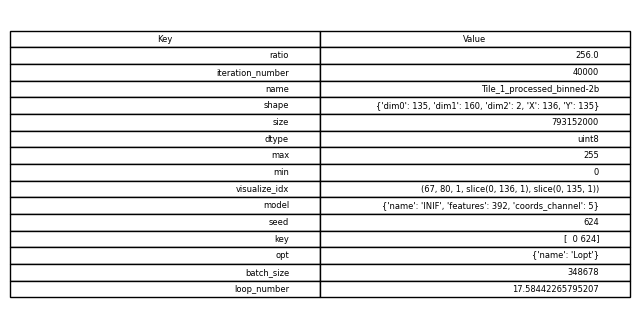

raw size: 756.40869140625MB
target size 2.954721450805664MB, param count: 774562, ratio: 256.0
actual param count: 773026, hidden size: 392, ratio: 255


/root/anaconda3/envs/silen/lib/python3.10/site-packages/haiku/_src/data_structures.py:206: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, structure = jax.tree_flatten(mapping)
/root/anaconda3/envs/silen/lib/python3.10/site-packages/haiku/_src/utils.py:205: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  return sum(x.size for x in jax.tree_leaves(tree))


In [3]:
params, meta_data = others.load(file_selector.value)
visualizer.display_metadata(meta_data)
model, _ = INR.get_model_param(meta_data)


Visualize slice index : (67, 80, 1, slice(0, 136, 1), slice(0, 135, 1))


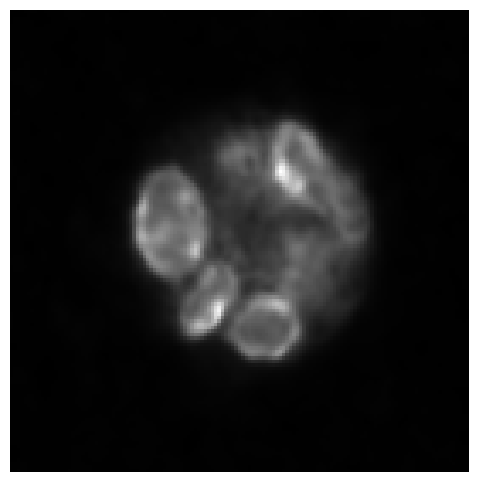

In [4]:
slice_idx = meta_data['visualize_idx']
print(f'Visualize slice index : {slice_idx}') # copy this index and edit to visualize other location
downsample_ratio = 1 # preview image with downsample ratio
slice_coord, image_shape = visualizer.get_slice(meta_data, slice_idx, downsample_ratio)
decode_image = model.apply(params, None, slice_coord).reshape(image_shape)
visualizer.plot2d(decode_image, cmap = 'gray') # cmaps: 'gray', 'jet', 'hot', 'bone', 'cubehelix', 'viridis', 'inferno', 'magma', 'plasma', 'cividis'